In [1]:
# quickSort =============================================================
# Hoare-partition =======================================================
def quickSortHoare(l):
  implementaHoareQS(l,0,len(l)-1)
 
def implementaHoareQS(l,firstKey,lastKey):
  if firstKey<lastKey:
      divKey = hoare_partition(l,firstKey,lastKey)
      implementaHoareQS(l,firstKey,divKey)
      implementaHoareQS(l,divKey+1,lastKey)

def hoare_partition(l,firstKey,lastKey):
  pivot = l[firstKey]
  i = firstKey-1
  j = lastKey+1
  while True:
      while True:
          i = i + 1
          if l[i] >= pivot:
              break
      while True:
          j = j - 1
          if l[j] <= pivot:
              break
      if i >= j:
        break
      else:
        l[i], l[j] = l[j], l[i]
  return j

''' 
# abaixo outra forma de particionamento que funcionou 
# para apreciação do professor
def hoare_partition(l,firstKey,lastKey):
  pivot = l[firstKey]
  i = firstKey-1
  j = lastKey+1
  while True:
      while True:
          i = i - 1
          if l[i] >= pivot:
              break
      while True:
          j = j + 1
          if l[j] <= pivot:
              break
      if i < j:
        break
      else:
        l[i], l[j] = l[j], l[i]
  return j 
'''

# lomuto_partition ======================================================
def quickSortLomuto(l):
  implementaLomutoQS(l,0,len(l)-1)
 
def implementaLomutoQS(l,firstKey,lastKey):
  if firstKey<lastKey:
      divKey = lomuto_partition(l,firstKey,lastKey)
      implementaLomutoQS(l,firstKey,divKey-1)
      implementaLomutoQS(l,divKey+1,lastKey)
 
def lomuto_partition(l,firstKey,lastKey):
  pivot = l[lastKey]
  i = firstKey-1
  for j in range(firstKey,lastKey): # foi utilizado r (lastKey) ao invés de r-1, algoritmo não executava até o último elemento
      if l[j] <= pivot:
          i = i + 1
          l[i], l[j] = l[j], l[i]
  l[i+1], l[lastKey] = l[lastKey], l[i+1]
  return i+1
# quickSort =============================================================
 
# mergeSort =============================================================
def mergeSort(l):
    if len(l)>1:
        div = len(l)//2
        firstKey = l[:div]
        lastKey = l[div:]
        mergeSort(firstKey)
        mergeSort(lastKey)
        i=0
        j=0
        k=0
        while i < len(firstKey) and j < len(lastKey):
            if firstKey[i] < lastKey[j]:
                l[k]=firstKey[i]
                i=i+1
            else:
                l[k]=lastKey[j]
                j=j+1
            k=k+1
 
        while i < len(firstKey):
            l[k]=firstKey[i]
            i=i+1
            k=k+1
 
        while j < len(lastKey):
            l[k]=lastKey[j]
            j=j+1
            k=k+1
# mergeSort =============================================================

In [5]:
import time
from numpy import random
DOMAIN = 1000000000 #1B

def equals(A,B):
   for i in range(len(A)):
      if A[i] != B[i]:
          return False
   return True

def avgTime(func, tam, num_rounds, nDebug=1, debug=False):
  t = 0
  for i in range(num_rounds):    
    random.seed(tam+i)
    #create a list with random numbers
    dataList = list(random.randint(DOMAIN, size=tam))
    L = dataList.copy()
    start = time.time()
    func(L)
    #m = func(dataList)
    end = time.time()
    t += end - start

    if debug and i <= nDebug: # i==1 para executar teste apenas uma vez
      #assert m == sorted(dataList)[len(dataList)//2]
      assert equals(L,sorted(dataList))
  return t/num_rounds

#defines the algorithms to be processed
algorithms = [quickSortHoare,quickSortLomuto,mergeSort]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 10

#define list sizes
sizes = [100000,200000,300000,400000,500000]

#define debug number of lists for test, default=1
nDebug = 5

mapSizeToTime = dict()
for i in range(len(sizes)):
  print(f"Starting round {i+1}, size={sizes[i]}")
  
  ##Map list size to algorithm average time
  for algorithm in algorithms:      
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avgTime(algorithm, sizes[i], num_rounds, nDebug, True)
  
print(f"Finish data collection")

Starting round 1, size=100000
Starting round 2, size=200000
Starting round 3, size=300000
Starting round 4, size=400000
Starting round 5, size=500000
Finish data collection


In [6]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
#df

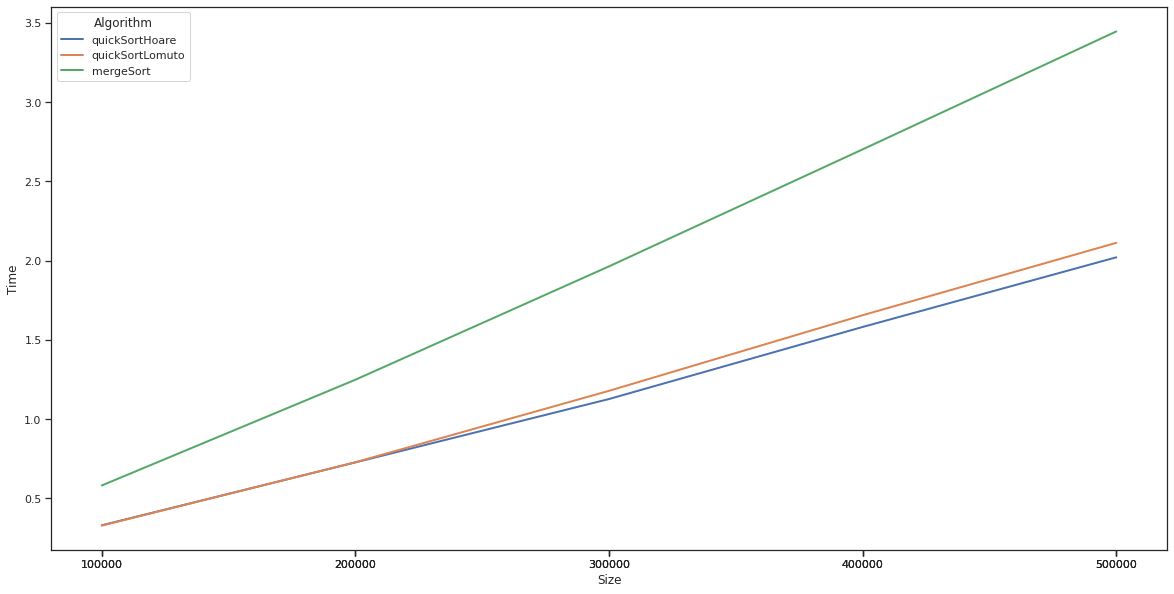

<Figure size 1440x720 with 0 Axes>

In [7]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]
g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
fig = plt.figure()
g.set(xticks=[i for i in df.Size])
#g.set_yscale('log')
#g.set_xscale('log')
plt.show()